In [ ]:
# Credit Card Fraud Detection

In [ ]:
## Imports and Custom Functions

In [42]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

from sklearn.ensemble import IsolationForest


from sklearn import set_config
set_config(transform_output = 'pandas')
# Supress Warnings, https://www.geeksforgeeks.org/how-to-disable-python-warnings/
import warnings
warnings.filterwarnings('ignore') 

## Import and Review the Data

In [10]:
df = pd.read_csv("Data/credit_card.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

In [18]:
df.isna().sum().sum()

0

## Data Cleaning

In [19]:
# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,...,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,...,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,...,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,...,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,...,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532


## Kmeans Analysis

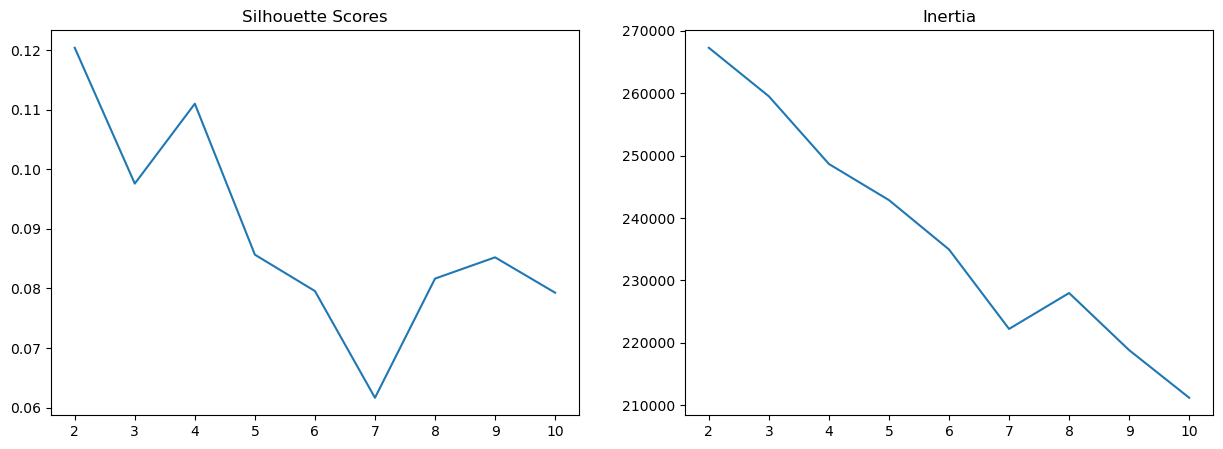

In [20]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(df_scaled)
  sils.append(silhouette_score(df_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [21]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=7, n_init= 'auto', random_state=42)
kmeans.fit(df_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,4
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,2
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,4
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,4
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,4


In [28]:
# Calculate distance to each cluster center
distances = cdist(df_scaled, kmeans.cluster_centers_, 'euclidean')

distances

array([[ 4.25969179,  4.88379677,  3.49283058, ...,  2.70926592,
         5.87239348, 21.13112736],
       [ 4.13158382,  3.5188718 ,  2.05380201, ...,  2.99780269,
         5.06857637, 20.33488936],
       [ 7.19946686,  7.73260751,  6.93658777, ...,  6.51947815,
         8.68280218, 21.54781395],
       ...,
       [ 6.35506911,  6.70569105,  7.56579752, ...,  7.18341329,
         8.24890485, 22.14482283],
       [ 6.04266819,  6.74794672,  7.31078561, ...,  6.65944812,
         4.9798396 , 21.67880468],
       [ 4.18035236,  3.45381831,  4.65228569, ...,  5.21173173,
         5.73203752, 21.10801695]])

In [29]:
# Saving distances as a dataframe for convenience
cluter_cols = [f"Distance (Cluster {c})" for  c in range(len(kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distances, columns = cluter_cols)
distance_df.head(3)


,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2),Distance (Cluster 3),Distance (Cluster 4),Distance (Cluster 5),Distance (Cluster 6)
0,4.259692,4.883797,3.492831,8.886221,2.709266,5.872393,21.131127
1,4.131584,3.518872,2.053802,9.648301,2.997803,5.068576,20.334889
2,7.199467,7.732608,6.936588,9.500419,6.519478,8.682802,21.547814


In [32]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# Display first 5 values
min_distances[:5]



array([2.70926592, 2.05380201, 6.51947815, 4.82300033, 3.04328895])

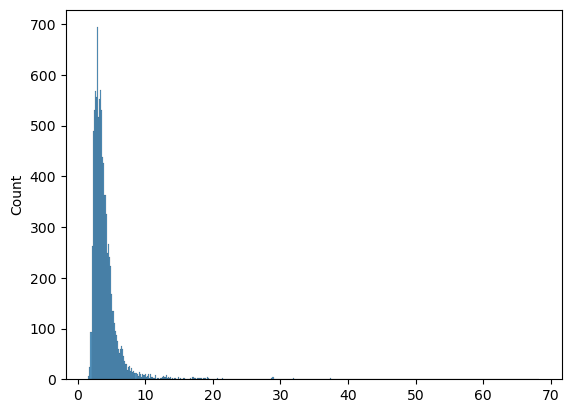

In [33]:
# distance from closet centroid
ax = sns.histplot(min_distances)



## Kmeans Anomaly Detection

In [34]:
# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 99.6)
threshold


18.967726024988668

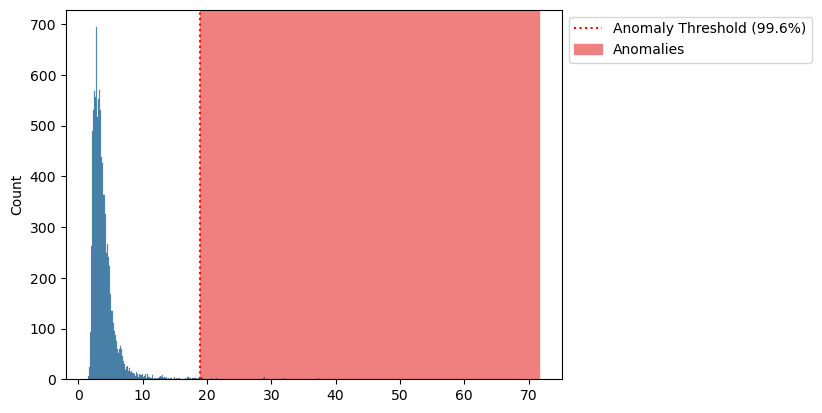

In [35]:
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (99.6%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral',zorder=0, label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);



In [36]:
# Identify anomalies where the distance to closest cluster center is above the threshold
filter_anomalies = min_distances > threshold
# how many were found?
filter_anomalies.sum()


40

In [38]:
# Getting the row indices of the anomalies
idx_anomalies = df_scaled[filter_anomalies].index
idx_anomalies


Int64Index([ 159, 1619, 2156, 2212, 2439, 2654, 2756, 2858, 2911, 2914, 2917,
            2923, 3057, 3443, 4779, 5303, 5412, 5413, 5529, 5674, 5704, 5764,
            6175, 6489, 6643, 6672, 7130, 7266, 7273, 7322, 7338, 7462, 7470,
            7596, 7597, 8163, 8437, 8645, 8939, 8999],
           dtype='int64')

In [39]:
# Slicing the anomalies from X (for demonstration)
df_scaled.iloc[idx_anomalies]



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
159,-3.834960,-9.431468,-5.686284,2.104654,-1.153193,3.584223,4.522820,-0.129306,-1.147362,-1.366035,...,12.960326,2.518824,-3.332963,-7.192555,2.023902,-1.141962,-1.367622,-1.773317,2.499616,20.320071
1619,-7.150070,-7.528445,-11.441444,4.009433,-27.290908,16.374319,31.878466,-5.938228,-2.347745,-2.195640,...,-19.791952,-5.125945,2.412080,-5.911458,1.395896,1.533320,1.248504,9.496001,15.504724,41.292747
2156,-3.674689,-9.158175,-3.656015,2.370064,-3.748184,0.415459,4.262012,-0.732546,-0.492485,-1.483717,...,12.238043,2.443958,-2.902722,-6.553469,1.000686,-2.487275,-0.031340,-1.778584,2.425582,19.461379
2212,-3.215208,3.026652,-1.687193,-2.215652,-0.775564,1.476574,-4.085387,-11.810305,0.773002,0.285954,...,-5.487786,16.278911,-6.764131,4.300451,-0.071619,-0.100710,-0.275131,1.512629,1.061451,-0.326762
2439,-7.824911,-12.184466,-1.114101,2.453688,9.132442,-5.838093,-6.342982,1.306016,-0.646520,-0.180378,...,7.457408,1.892358,-1.190891,0.083439,-0.193509,-0.965160,0.213631,0.481461,-8.850109,0.299547
2654,-4.789278,2.105598,-1.241513,0.500971,0.085842,2.026108,-5.749739,-15.222733,0.203976,0.678419,...,-6.412602,10.683389,-4.582514,5.469079,0.696040,0.498896,-0.683721,3.195176,-2.405010,-0.186922
2756,-6.913533,-7.777855,0.673923,1.964941,6.806898,-3.195860,-8.233600,-4.009462,1.273875,-0.009641,...,-8.166138,-4.784251,2.834458,-1.390803,1.062015,-1.474357,1.074814,8.311982,-4.891511,0.110575
2858,-2.794147,3.627035,-2.608324,-0.017060,1.127610,0.273505,-3.372254,-10.038721,-0.401403,-0.410035,...,-4.376623,13.498816,-6.502582,1.083887,-0.199768,-0.816617,-1.043062,2.590559,1.872770,-0.335995
2911,-2.686228,3.031804,-2.148883,-0.012320,-1.157837,1.912165,-10.291944,-18.772044,-2.282244,-4.544346,...,9.779945,-12.357685,6.045469,-0.347143,1.526074,1.239905,-0.878097,-0.345087,2.003279,-0.342960
2914,-3.373200,3.695652,-2.902472,-1.207739,-1.765355,1.981334,-8.937355,-18.411315,-2.194496,-5.294882,...,9.324958,-12.168847,7.149597,4.030761,1.285824,-1.838153,-2.001656,-0.056798,1.939579,-0.342960


In [41]:
list_of_kmeans_anomalies = list(idx_anomalies)

list_of_kmeans_anomalies

[159,
 1619,
 2156,
 2212,
 2439,
 2654,
 2756,
 2858,
 2911,
 2914,
 2917,
 2923,
 3057,
 3443,
 4779,
 5303,
 5412,
 5413,
 5529,
 5674,
 5704,
 5764,
 6175,
 6489,
 6643,
 6672,
 7130,
 7266,
 7273,
 7322,
 7338,
 7462,
 7470,
 7596,
 7597,
 8163,
 8437,
 8645,
 8939,
 8999]

## Isolation Forest Analysis

In [43]:
# Instantiate Isolation Forest mmodel and set contamination Level
iso_for = IsolationForest(contamination=.004, random_state=42)
iso_for.fit(df)

# Make predictions
predictions = iso_for.predict(df)
predictions[:5]

array([1, 1, 1, 1, 1])

## Isolation Forest Anomaly Indexes

In [46]:
# Create filter for iso anomalies
iso_filter = predictions == -1
iso_anomalies = df[iso_filter].index
iso_anomalies


Int64Index([ 159, 1619, 2156, 2756, 2914, 2917, 2923, 4493, 5303, 5704, 5977,
            6200, 6311, 6579, 6581, 6595, 6634, 6643, 6672, 6741, 6757, 6761,
            6829, 7338, 7470, 7597, 8124, 8163, 8437, 8442, 8667, 8670, 8856,
            8939, 8999, 9071, 9304, 9326, 9903, 9919],
           dtype='int64')

## Comparing the lists of Anomalies

In [47]:
# Make a list of anomolies identified in both methods
both = [a for a in iso_anomalies if a in idx_anomalies]

both

[159,
 1619,
 2156,
 2756,
 2914,
 2917,
 2923,
 5303,
 5704,
 6643,
 6672,
 7338,
 7470,
 7597,
 8163,
 8437,
 8939,
 8999]

In [49]:
len(iso_anomalies)

40

In [50]:
len(idx_anomalies)

40

In [51]:
len(both)

18

In [54]:
diff_aiso = len(iso_anomalies) - len(both)

diff_aidx = len(idx_anomalies) - len(both)

In [55]:
len(both)/(diff_aiso + diff_aidx + len(both))

0.2903225806451613

Both approaches agree on 18 anomalies. This equates to about 29% of the anomalies.

To-Dos:
Use PCA before clustering to perform visualization